# Plot history

In this file, we are going to plot the results of our simulation.

We will perform the following actions:
* Plot the real values of the PDE function
* Plot the estimated PDE values generated using Monte Carlo simulation

Please run the following codes:

## Table of Content

- [1 - Packages](#1)
- [2 - Plotting the results of our simulation](#2)
    - [2.1 - Load the relevant csv files](#2-1)
    - [2.2 - Plot the PDE in one dimension: fix x in {2, 3, ..., 10} and varies t within [0, x-1]](#2-2)

<a name='1'></a>
## 1 - Packages

Run the cell below to import all the libraries you'll need:

In [1]:
# From system
import os
import shutil
from pathlib import Path
import random

# Data structure
import numpy as np
import pandas as pd
import json
import csv

# Plotting graph
from matplotlib import pyplot as plt

<a name='2'></a>
## 2 - Plotting the results of our simulation

<a name='2-1'></a>
### 2.1 - Load the relevant csv files

In [2]:
np_dictionary = {}

dir_name = "results"
os_listdir = os.listdir(dir_name)
for file_name in os_listdir:
    file_path = os.path.join(dir_name, file_name)
    data =  pd.read_csv(file_path, delimiter=',', dtype=None, header=None)
    np_dictionary[file_name[:-4]] = data

<a name='2-3'></a>
### 2.2 - Plot the PDE in one dimension: fix x=3 and varies t within [0, 2]

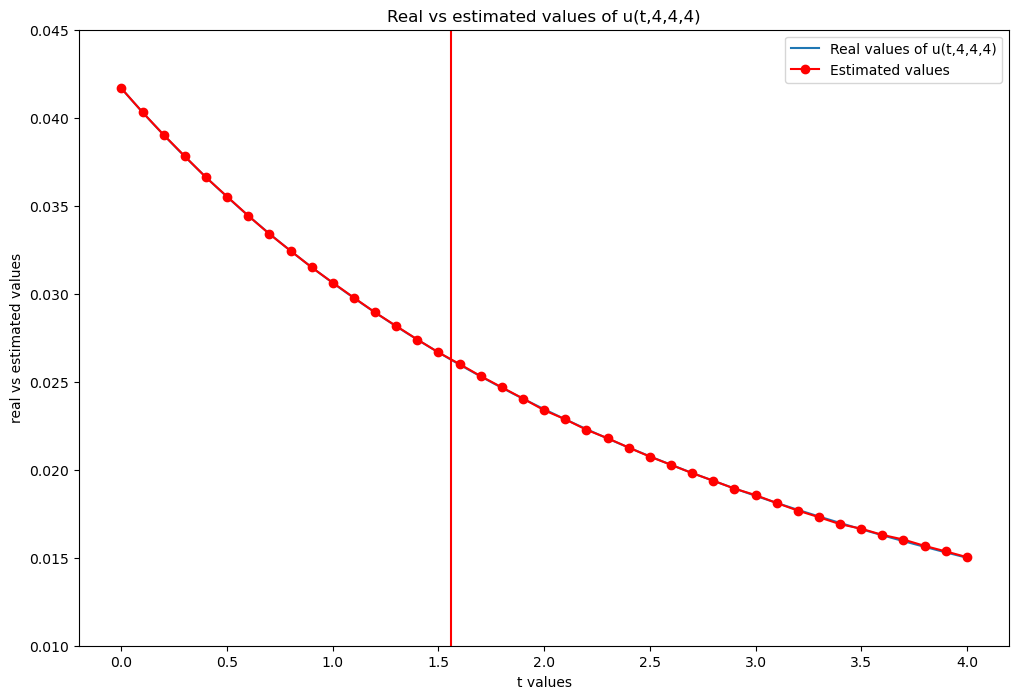

In [3]:
impose_ylim = True
y_lim = [0.010,0.045]

real_values = np.asarray(np_dictionary["analytic"])
real_values = np.reshape(real_values, (1001,))[0:401]
t_values = np.arange(0, 4.01, 0.01)
estimated_values = np.asarray(np_dictionary["monte_carlo"])
estimated_values = np.reshape(estimated_values, (41,))[0:41]
t_estimated = np.arange(0, 4.1, 0.1)

plt.figure(figsize=(12, 8))
plt.plot(t_values, real_values, label='Real values of u(t,4,4,4)')
plt.plot(t_estimated, estimated_values, 'ro-', label='Estimated values')

plt.ylabel('real vs estimated values')
if impose_ylim:
    plt.ylim(y_lim)
plt.xlabel('t values')
plt.axvline(x=1.56,color='red')

plt.title('Real vs estimated values of u(t,4,4,4)')
plt.legend(loc='upper right')
plt.show()

In [4]:
import math

t_vector = [i/100 for i in range(400)]
bound = []
for T in t_vector:
    estimated_bound = 288 * math.sqrt(3) * (2*T*T+64) / pow(2*T*T-64, 2) * (T*8) / pow(64-2*T*T, 2) * T * math.exp(2*T) * (1-math.exp(-T))
    bound.append(estimated_bound)

bound_print = [(i, bound[i]) for i in range(400)]
print(bound_print)

[(0, 0.0), (1, 1.545347638437949e-08), (2, 1.2550365775161152e-07), (3, 4.300189110740828e-07), (4, 1.0348522562656444e-06), (5, 2.052107783550487e-06), (6, 3.600417598226457e-06), (7, 5.805229688623869e-06), (8, 8.799107127651163e-06), (9, 1.272203903344555e-05), (10, 1.772176373033002e-05), (11, 2.395410456753794e-05), (12, 3.1583318870025645e-05), (13, 4.078246051317176e-05), (14, 5.173375663128554e-05), (15, 6.46289989886365e-05), (16, 7.966995056120035e-05), (17, 9.70687678975173e-05), (18, 0.00011704843984800435), (19, 0.00013984324327378147), (20, 0.00016569921636859107), (21, 0.00019487465025074224), (22, 0.00022764059950622126), (23, 0.0002642814123892219), (24, 0.00030509528141238), (25, 0.00035039481508599807), (26, 0.0004005076315935387), (27, 0.0004557769752197016), (28, 0.0005165623563775013), (29, 0.0005832402161119897), (30, 0.0006562046159906385), (31, 0.0007358679543239819), (32, 0.0008226617096949403), (33, 0.0009170372128113596), (34, 0.0010194664477337595), (35, 0.

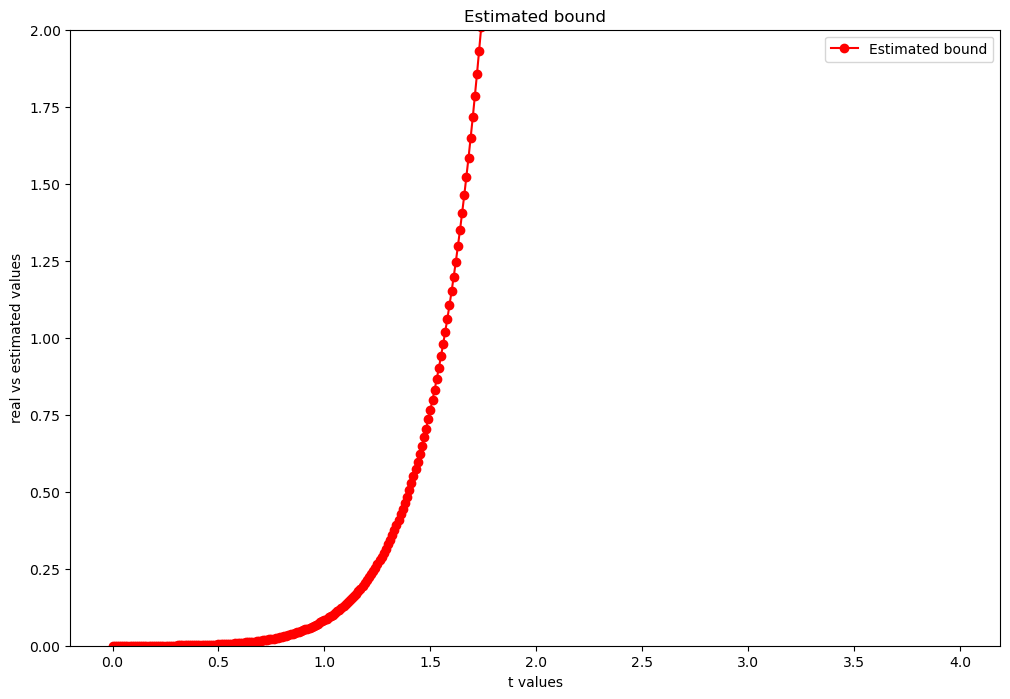

In [5]:
impose_ylim = True
y_lim = [0,2]

plt.figure(figsize=(12, 8))
plt.plot(t_vector, bound, 'ro-', label='Estimated bound')

plt.ylabel('real vs estimated values')
if impose_ylim:
    plt.ylim(y_lim)
plt.xlabel('t values')
# plt.axvline(x=30,color='red')

plt.title('Estimated bound')
plt.legend(loc='upper right')
plt.show()